In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from pandas_datareader.data import DataReader
import yfinance as yf
from  pandas_datareader import data as pdr
from datetime import datetime

In [31]:
import os
directory = '/content/drive/MyDrive/stock_forecasting/dataset'

In [32]:
df = pd.DataFrame()
for fname in os.listdir(directory):
    if fname.endswith('.csv'):
        df1 = pd.read_csv(os.path.join(directory, fname))
        df = pd.concat([df, df1], ignore_index=True)

In [33]:
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0
...,...,...,...,...,...,...,...,...
459330,VIC,12/22/2020 14:22,105.80,105.80,105.70,105.70,1870,0
459331,VIC,12/22/2020 14:23,105.70,105.70,105.70,105.70,2510,0
459332,VIC,12/22/2020 14:24,105.70,105.70,105.70,105.70,3620,0
459333,VIC,12/22/2020 14:25,105.70,105.70,105.70,105.70,100,0


In [34]:
import datetime

def str_to_datetime(s):
    date = s.split()[0].split('/')
    time = s.split()[1].split(':')
    year, month, day, hour = int(date[2]), int(date[0]), int(date[1]), int(time[0])
    return datetime.datetime(year=year, month=month, day=day, hour=hour)

In [35]:
str_to_datetime('2/12/2022 09:43')

datetime.datetime(2022, 2, 12, 9, 0)

In [36]:
df_copy = df
df_copy.rename(columns={'Date/Time': 'Date'}, inplace=True)
df_copy['Date'] = df_copy['Date'].apply(str_to_datetime)

In [37]:
df_copy = df_copy.groupby(['Ticker', 'Date']).agg({'Volume': 'sum', 'Open': 'mean', 'High': 'mean', 'Low': 'mean', 'Close': 'mean', 'Open Interest': 'mean'}).reset_index()
df_copy = df_copy.sort_values(by=["Ticker", "Date"])
df_copy

,Ticker,Date,Volume,Open,High,Low,Close,Open Interest
0,FPT,2018-12-25 09:00:00,84960,30.760000,30.781429,30.744286,30.760000,0.0
1,FPT,2018-12-26 09:00:00,49950,31.055714,31.065357,31.047500,31.057143,0.0
2,FPT,2018-12-26 10:00:00,95330,31.121842,31.125789,31.116579,31.121579,0.0
3,FPT,2018-12-26 11:00:00,37300,31.036875,31.046250,31.034375,31.046250,0.0
4,FPT,2018-12-26 13:00:00,61280,30.993200,31.002800,30.993200,31.002800,0.0
...,...,...,...,...,...,...,...,...
12502,VIC,2020-12-22 09:00:00,229220,106.388095,106.440476,106.311905,106.354762,0.0
12503,VIC,2020-12-22 10:00:00,84020,106.210345,106.244828,106.144828,106.179310,0.0
12504,VIC,2020-12-22 11:00:00,75890,106.051852,106.085185,105.948148,105.996296,0.0
12505,VIC,2020-12-22 13:00:00,90580,105.720339,105.749153,105.672881,105.718644,0.0


In [38]:
df_copy.index = df_copy.pop('Date')
df_copy

,Ticker,Volume,Open,High,Low,Close,Open Interest
Date,,,,,,,
2018-12-25 09:00:00,FPT,84960,30.760000,30.781429,30.744286,30.760000,0.0
2018-12-26 09:00:00,FPT,49950,31.055714,31.065357,31.047500,31.057143,0.0
2018-12-26 10:00:00,FPT,95330,31.121842,31.125789,31.116579,31.121579,0.0
2018-12-26 11:00:00,FPT,37300,31.036875,31.046250,31.034375,31.046250,0.0
2018-12-26 13:00:00,FPT,61280,30.993200,31.002800,30.993200,31.002800,0.0
...,...,...,...,...,...,...,...
2020-12-22 09:00:00,VIC,229220,106.388095,106.440476,106.311905,106.354762,0.0
2020-12-22 10:00:00,VIC,84020,106.210345,106.244828,106.144828,106.179310,0.0
2020-12-22 11:00:00,VIC,75890,106.051852,106.085185,105.948148,105.996296,0.0


In [39]:
FPT = df_copy.loc[df_copy['Ticker']=='FPT']
MSN = df_copy.loc[df_copy['Ticker']=='MSN']
PNJ = df_copy.loc[df_copy['Ticker']=='PNJ']
VIC = df_copy.loc[df_copy['Ticker']=='VIC']

In [40]:
company_list = [FPT, MSN, PNJ, VIC]
company_name = ["FPT", "MSN", "PNJ", "VIC"]

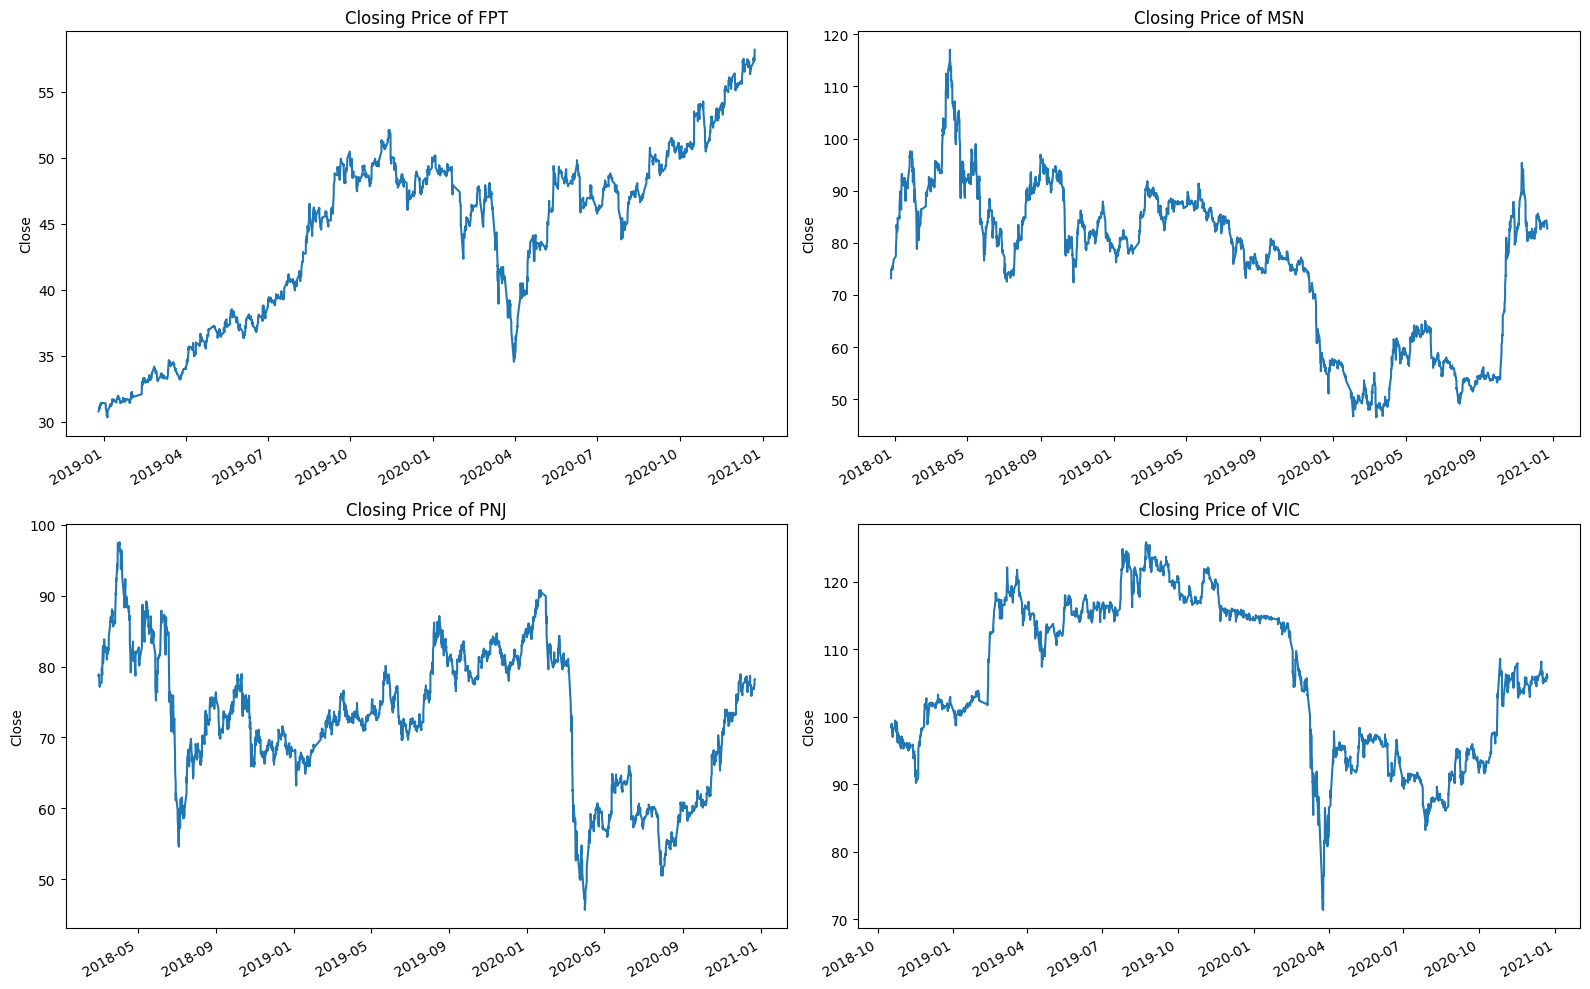

In [41]:
plt.figure(figsize=(16,10))
plt.subplots_adjust(top=1.50,bottom=1.4)
for i, company in enumerate (company_list,1):
    plt.subplot(2,2,i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
plt.tight_layout()
plt.savefig('Trends.png')

<ipython-input-42-6e335cf1e843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df['Close'].rolling(ma).mean()
<ipython-input-42-6e335cf1e843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df['Close'].rolling(ma).mean()
<ipython-input-42-6e335cf1e843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

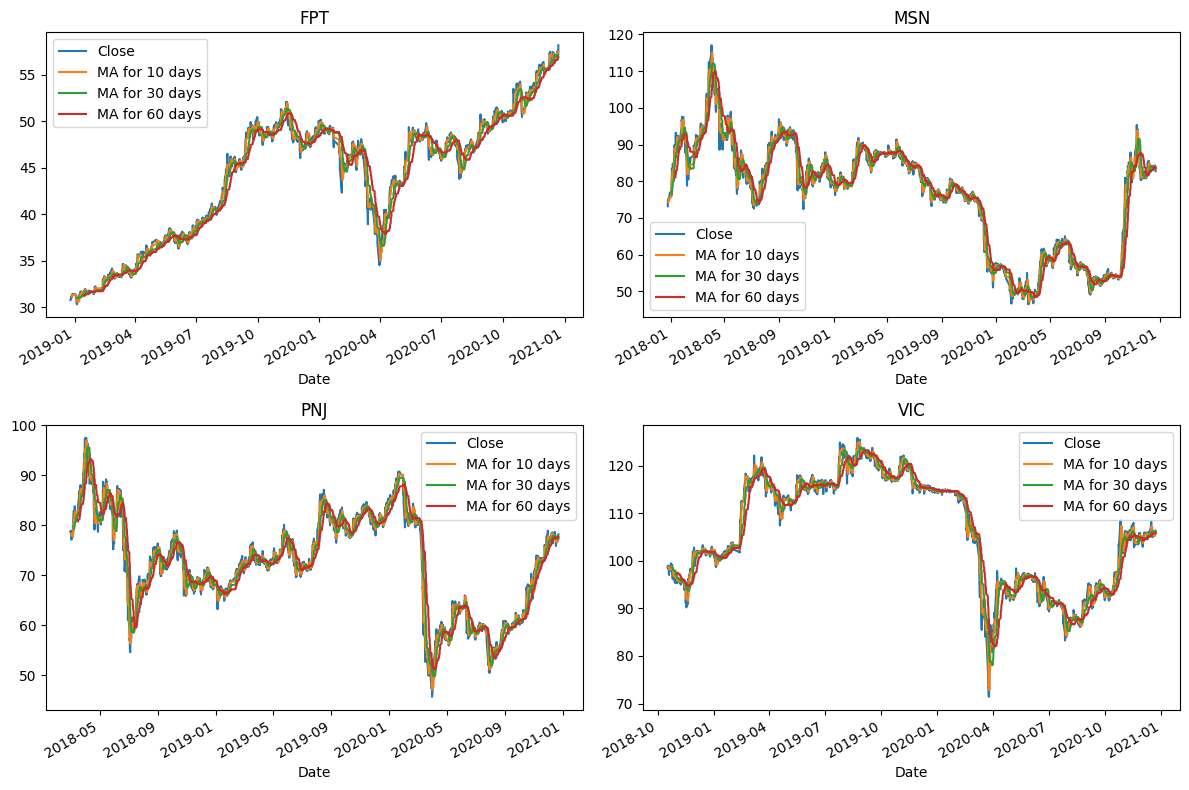

In [42]:
def plot_stock_with_moving_averages(df, ma_days, title, ax):
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        df[column_name] = df['Close'].rolling(ma).mean()

    cols_to_plot = ['Close'] + [f'MA for {ma} days' for ma in ma_days]
    df[cols_to_plot].plot(ax=ax)
    ax.set_title(title)

ma_day = [10, 30, 60]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    if i < len(company_list):
        plot_stock_with_moving_averages(company_list[i], ma_day, company_name[i], ax)

fig.tight_layout()


plt.savefig('stock_plots.png')

# Show the plot
plt.show()

<ipython-input-43-143bc0893cc2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Close'].pct_change()
<ipython-input-43-143bc0893cc2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Close'].pct_change()
<ipython-input-43-143bc0893cc2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

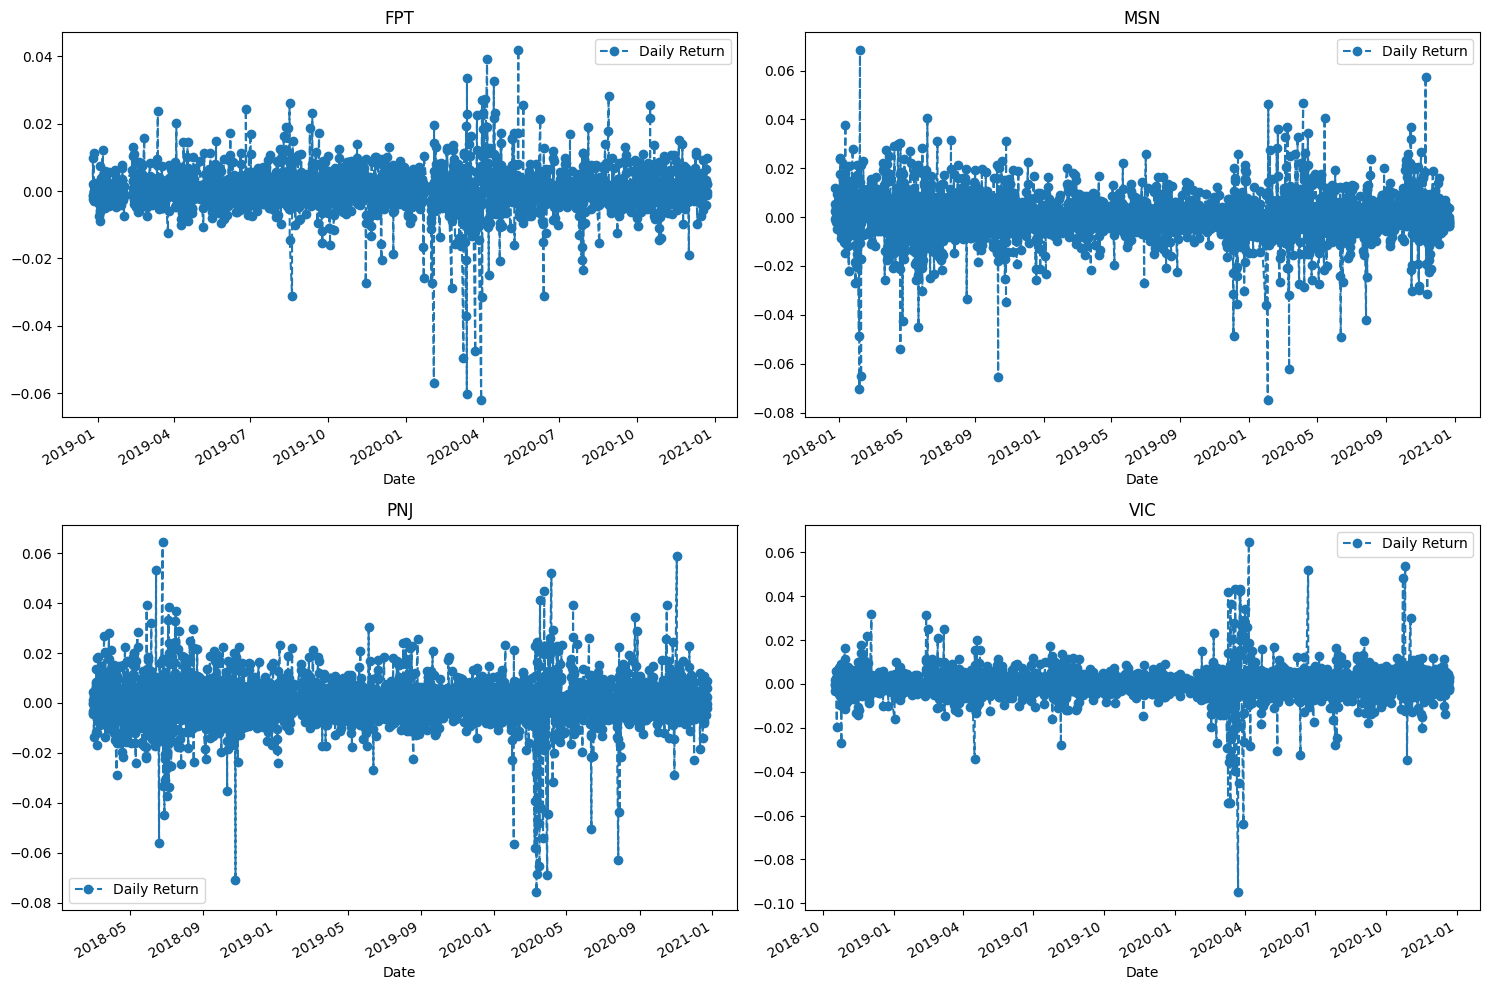

In [43]:
company_data = [(FPT, 'FPT'), (MSN, 'MSN'), (PNJ, 'PNJ'), (VIC, 'VIC')]


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (company, name) in enumerate(company_data):

    company['Daily Return'] = company['Close'].pct_change()


    ax = axes[i // 2, i % 2]
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(name)


fig.tight_layout()


plt.show()

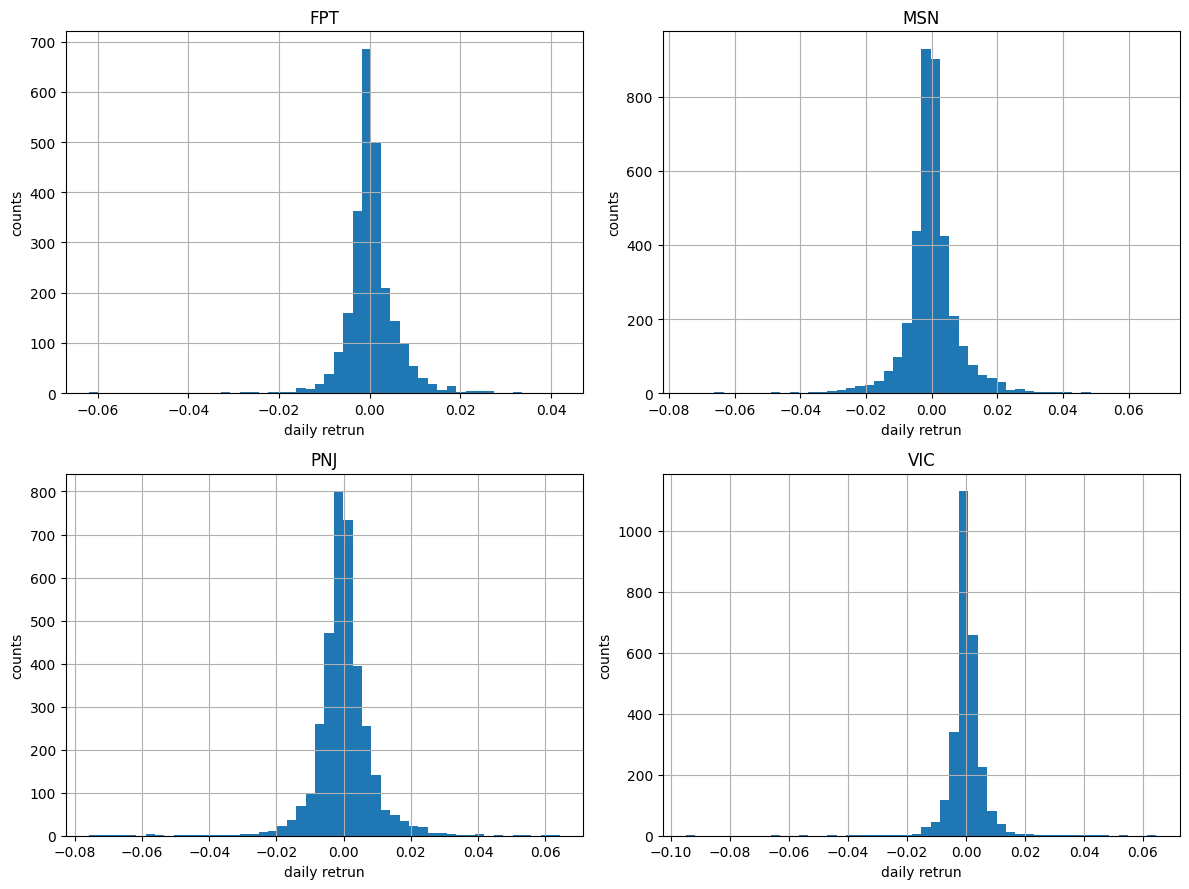

In [44]:
plt.figure(figsize=(12,9))

for i,company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('daily retrun')
    plt.ylabel('counts')
    plt.title(f'{company_name[i-1]}')
plt.tight_layout()
plt.savefig('average daily price.png')

In [45]:
df

,Ticker,Date,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2018-02-28 09:00:00,78.14,78.99,78.14,78.99,270,0
1,PNJ,2018-02-28 09:00:00,78.94,78.94,78.94,78.94,10,0
2,PNJ,2018-02-28 09:00:00,78.14,78.14,78.14,78.14,283,0
3,PNJ,2018-02-28 09:00:00,78.14,78.14,78.14,78.14,480,0
4,PNJ,2018-02-28 09:00:00,78.14,78.14,78.14,78.14,146,0
...,...,...,...,...,...,...,...,...
459330,VIC,2020-12-22 14:00:00,105.80,105.80,105.70,105.70,1870,0
459331,VIC,2020-12-22 14:00:00,105.70,105.70,105.70,105.70,2510,0
459332,VIC,2020-12-22 14:00:00,105.70,105.70,105.70,105.70,3620,0
459333,VIC,2020-12-22 14:00:00,105.70,105.70,105.70,105.70,100,0


In [46]:
closing_df = df
closing_df.rename(columns={'Date/Time': 'Date'}, inplace=True)
#df1['Date'] = df1['Date'].apply(str_to_datetime)
closing_df = closing_df.groupby(['Ticker', 'Date']).agg({'Volume': 'sum', 'Open': 'mean', 'High': 'mean', 'Low': 'mean', 'Close': 'mean', 'Open Interest': 'mean'}).reset_index()

closing_df = closing_df.set_index(['Date', 'Ticker'], inplace = False)['Close']
closing_df = closing_df.unstack()

tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,FPT,MSN,PNJ,VIC
Date,,,,
2017-12-25 09:00:00,NaN,NaN,NaN,NaN
2017-12-25 10:00:00,NaN,0.005464,NaN,NaN
2017-12-25 11:00:00,NaN,0.002491,NaN,NaN
2017-12-25 13:00:00,NaN,-0.000802,NaN,NaN
2017-12-25 14:00:00,NaN,0.012084,NaN,NaN


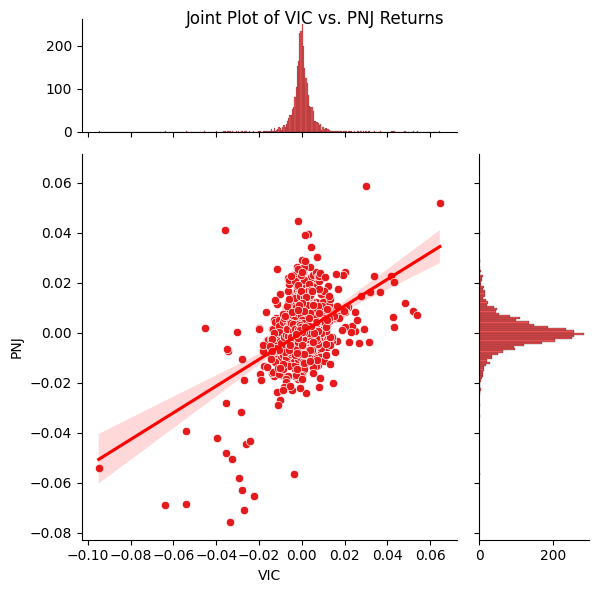

In [47]:
sns.set_palette("Set1")

jointplot = sns.jointplot(x='VIC', y='PNJ', data=tech_rets, kind='scatter', height=6, ratio=3, marginal_ticks=True)

plt.suptitle("Joint Plot of VIC vs. PNJ Returns", fontsize=12)

# Add regression lines
sns.regplot(x='VIC', y='PNJ', data=tech_rets, scatter=False, ax=jointplot.ax_joint, color='r')
# plt.savefig('Goog vs MSFT.png')


plt.show()

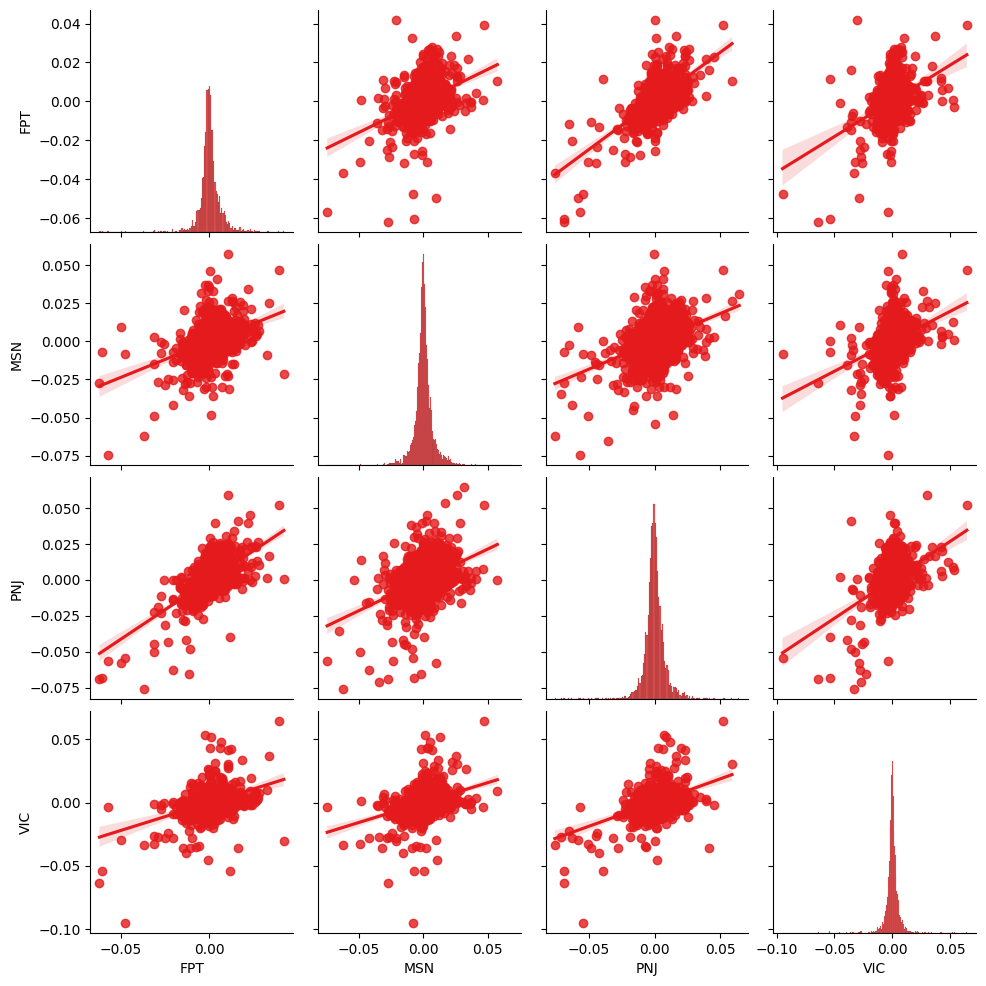

In [48]:
sns.pairplot(tech_rets, kind = 'reg')
plt.savefig('pairplot.png')
plt.savefig('Pairplot.png')

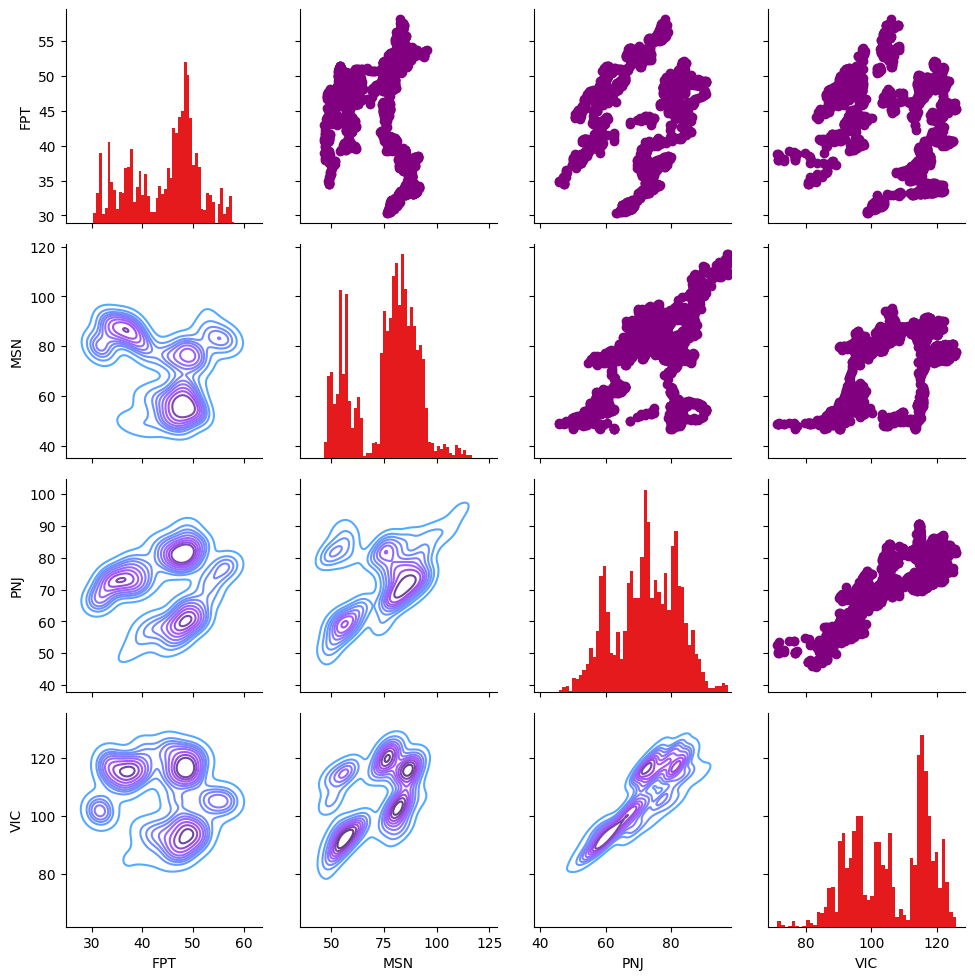

In [49]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=50)
plt.savefig('pairgrid.png')

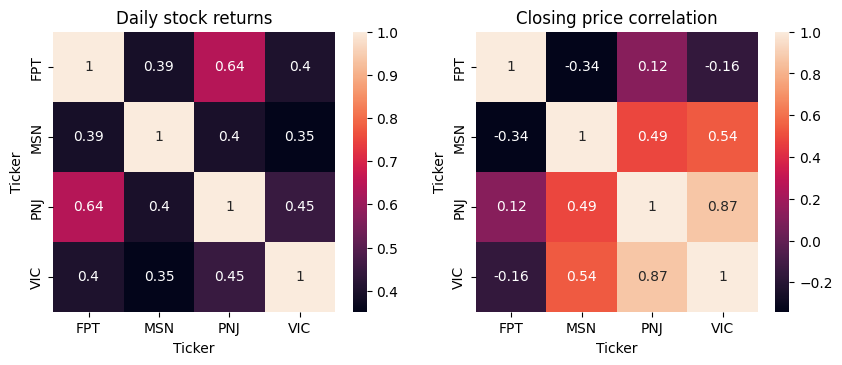

In [50]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True)
plt.title('Daily stock returns')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True)
plt.title('Closing price correlation')
plt.savefig('Correlation matrix.png')

In [51]:
rets = tech_rets.dropna()
std = rets.std()

In [52]:
VaR = (std * 1.96)
print('VaR at 95% Confidence level in %:', VaR)

VaR at 95% Confidence level in %: Ticker
FPT    0.012094
MSN    0.014604
PNJ    0.015515
VIC    0.013240
dtype: float64


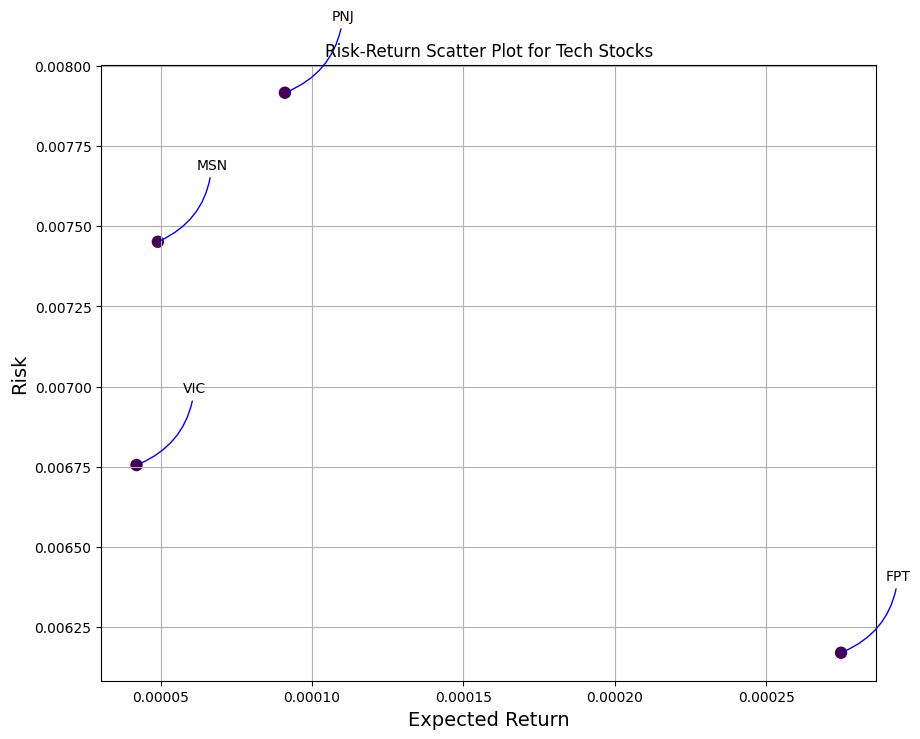

In [53]:
import matplotlib.cm as cm

area = np.pi * 20
cmap = cm.viridis

plt.figure(figsize=(10, 8), facecolor='white')
plt.scatter(rets.mean(), rets.std(), s=area, c=cmap(rets.mean()), marker='o')
plt.grid(True)
plt.xlabel('Expected Return', fontsize=14)
plt.ylabel('Risk', fontsize=14)
plt.title('Risk-Return Scatter Plot for Tech Stocks')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.savefig('risk.png')
plt.show()

In [58]:
dataset = MSN.iloc[:, 1:6]
dataset

,Volume,Open,High,Low,Close
Date,,,,,
2017-12-25 09:00:00,46390,73.191304,73.226087,73.178261,73.200000
2017-12-25 10:00:00,51160,73.583333,73.600000,73.583333,73.600000
2017-12-25 11:00:00,27600,73.800000,73.800000,73.783333,73.783333
2017-12-25 13:00:00,23660,73.751724,73.751724,73.724138,73.724138
2017-12-25 14:00:00,58560,74.615000,74.615000,74.615000,74.615000
...,...,...,...,...,...
2020-12-22 09:00:00,230860,83.465116,83.525581,83.381395,83.430233
2020-12-22 10:00:00,105870,83.350000,83.366667,83.329630,83.350000
2020-12-22 11:00:00,152810,83.075862,83.086207,83.048276,83.058621


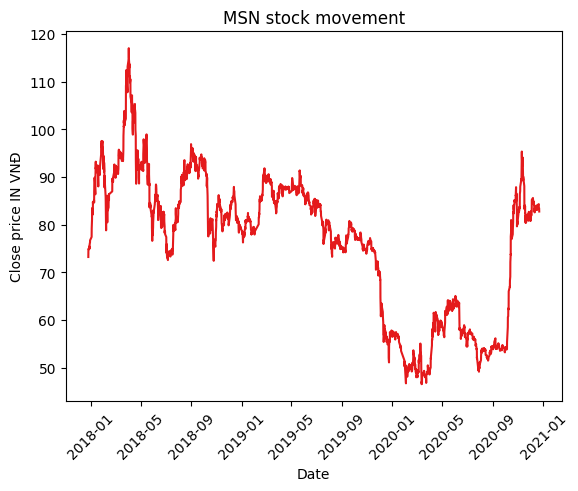

In [60]:
plt.Figure(figsize=(13, 6))
plt.plot(dataset['Close'])
plt.xlabel('Date')
plt.ylabel('Close price IN VNĐ')
plt.xticks(rotation=45, fontsize=10)
plt.title('MSN stock movement')
plt.show()

In [79]:
data = dataset.filter(['Close'])

dts = data.values

training_data_len = int(np.ceil(len(dts)*.8))
training_data_len

2987

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dts)

In [81]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

    if i<=30:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.37851171, 0.38418363, 0.38678326, 0.38594388, 0.39857611,
       0.40240728, 0.40115999, 0.40403533, 0.40288322, 0.40307111,
       0.40539423, 0.40838075, 0.41002951, 0.40789538, 0.40888009,
       0.40364145, 0.40533001, 0.40322506, 0.40600817, 0.41621327,
       0.42246906, 0.42791409, 0.43824861, 0.45750495, 0.46314732,
       0.46070384, 0.46359044, 0.49053204, 0.51816815, 0.52016779])]
[0.5240074582903972]



In [82]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [83]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

In [85]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2957/2957 [==============================] - 83s 26ms/step - loss: 4.8872e-04
Epoch 2/5
2957/2957 [==============================] - 80s 27ms/step - loss: 4.9803e-04
Epoch 3/5
2957/2957 [==============================] - 76s 26ms/step - loss: 4.4780e-04
Epoch 4/5
2957/2957 [==============================] - 78s 26ms/step - loss: 4.8902e-04
Epoch 5/5
2957/2957 [==============================] - 79s 27ms/step - loss: 4.6730e-04


In [86]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 30:, :]

# Initialize lists for x_test and y_test
x_test = []
y_test = dts[training_data_len:, :]

# Create input sequences for testing
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

# Convert x_test to a numpy array and reshape it
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Get model predictions and inverse transform them
predictions = scaler.inverse_transform(model.predict(x_test))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

24/24 [==============================] - 1s 12ms/step


0.8457113468494997

<ipython-input-87-9271de201c76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


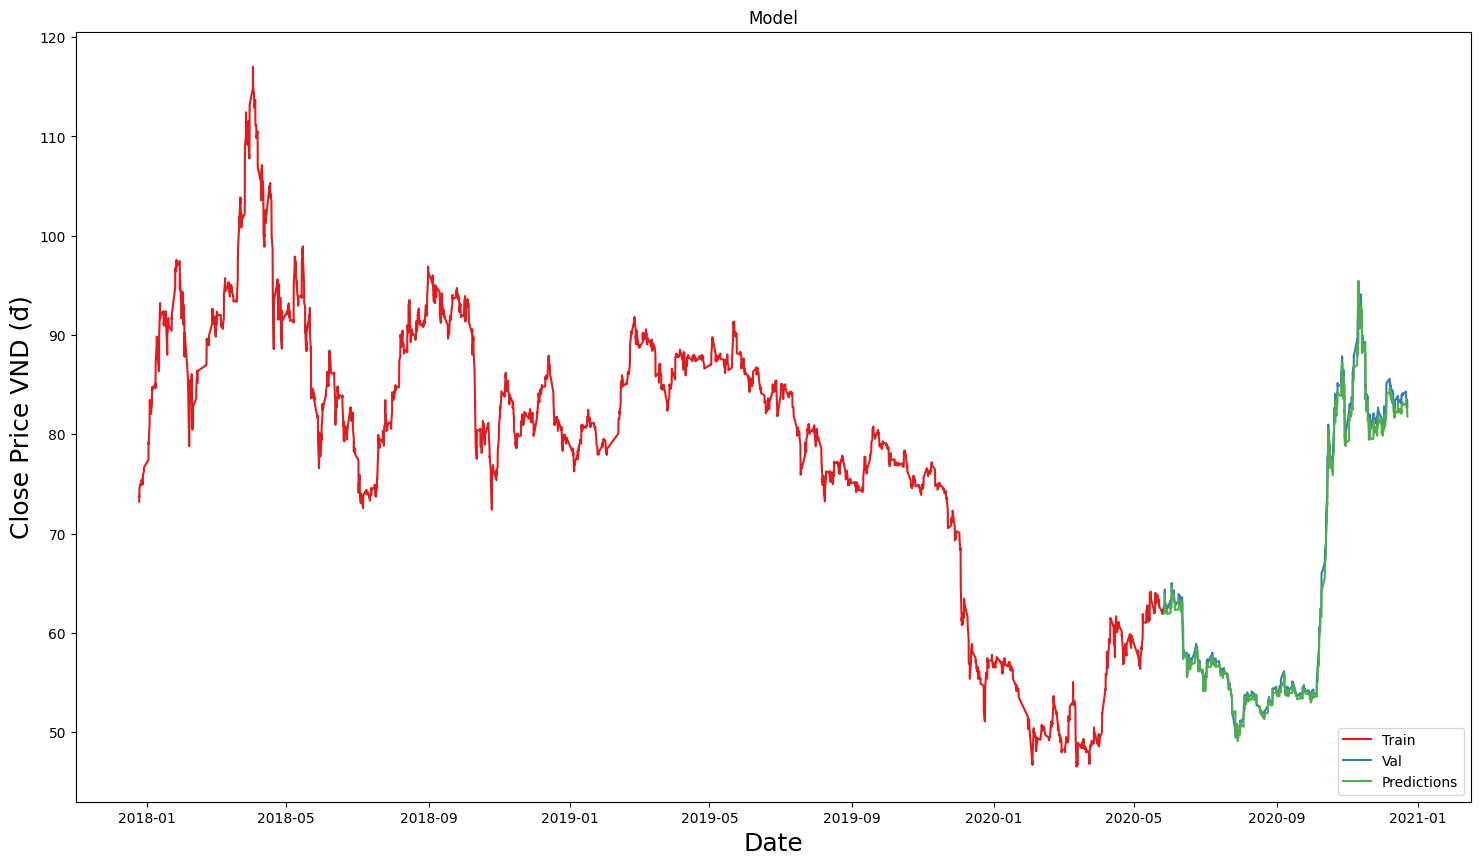

In [87]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(18,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND (đ)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('predicted.png')
plt.show()

In [88]:
valid

,Close,Predictions
Date,,
2020-05-26 14:00:00,62.460000,61.972420
2020-05-27 09:00:00,63.035556,61.937061
2020-05-27 10:00:00,63.861667,62.597954
2020-05-27 11:00:00,64.346667,63.406319
2020-05-27 13:00:00,63.793103,63.804787
...,...,...
2020-12-22 09:00:00,83.430233,82.622955
2020-12-22 10:00:00,83.350000,82.465576
2020-12-22 11:00:00,83.058621,82.410645
